# TITANIC DISASTER ANALYSIS

In [144]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [145]:
# Load dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
# Print data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [147]:
# Show number of NaN values in dataframe
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

I could replace the missing data in the age column with the average of the ages.
At the moment, for the analyses considered, it does not matter.

In [148]:
# Full name of cities in column 'Embarked'
cherbourg = df['Embarked'] == 'C'
df.loc[cherbourg, 'Embarked'] = 'Cherbourg'

queenstown = df['Embarked'] == 'Q'
df.loc[queenstown, 'Embarked'] = 'Queenstown'

southampton = df['Embarked'] == 'S'
df.loc[southampton, 'Embarked'] = 'Southampton'

#### How many people survived the Titanic disaster?

In [149]:
num_survived = (df['Survived'] == 1).sum()
print('Number of passengers survived:', num_survived)

Number of passengers survived: 342


#### What was the age distribution of the passengers on board?

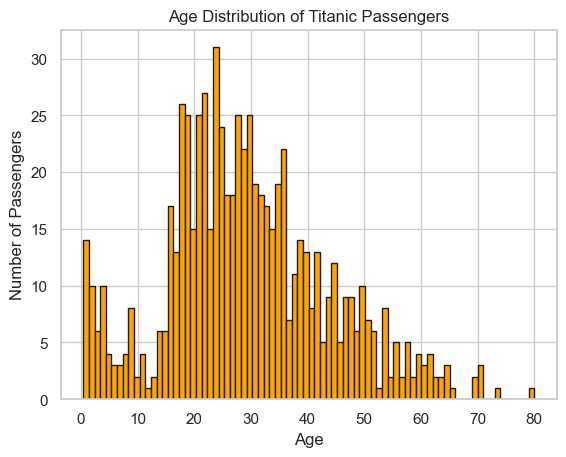

In [150]:
plt.hist(df['Age'], bins=80, edgecolor='k', color='orange')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Titanic Passengers')
plt.show()

#### How many passengers were men and how many were women?

In [151]:
total_male = (df['Sex'] == 'male').sum()
total_female = (df['Sex'] == 'female').sum()

print('Number of male passengers on board:', total_male)
print('Number of female passengers on board:', total_female)

Number of male passengers on board: 577
Number of female passengers on board: 314


Text(0.5, 1.0, 'Percentage of male and female on board')

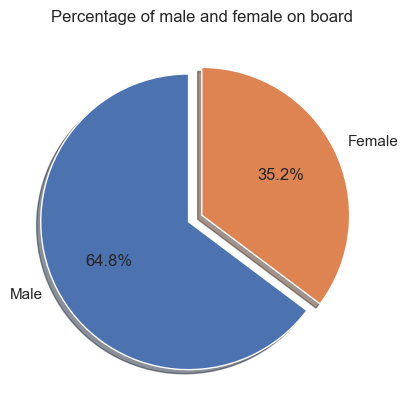

In [152]:
plt.pie(
    [total_male, total_female], 
    labels=['Male', 'Female'], 
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=True, 
    explode=[0.1, 0]
)
plt.title('Percentage of male and female on board')

#### How many passengers were in each class (1ª, 2ª, 3ª)?

In [153]:
total_number_of_first_class_passengers = (df['Pclass'] == 1).sum()
total_number_of_second_class_passengers = (df['Pclass'] == 2).sum()
total_number_of_third_class_passengers = (df['Pclass'] == 3).sum()

print('Number of passengers in first class:', total_number_of_first_class_passengers)
print('Number of passengers in second class:', total_number_of_second_class_passengers)
print('Number of passengers in third class:', total_number_of_third_class_passengers)

Number of passengers in first class: 216
Number of passengers in second class: 184
Number of passengers in third class: 491


Text(0.5, 1.0, 'Percentage of passengers by class')

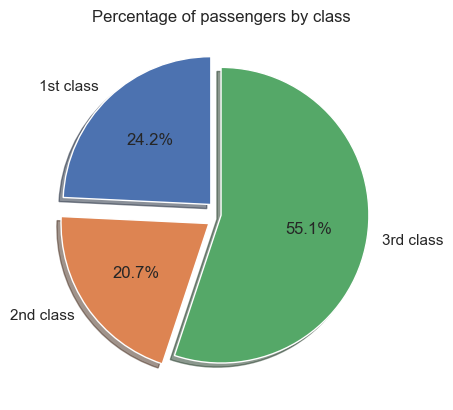

In [154]:
plt.pie(
    [total_number_of_first_class_passengers, total_number_of_second_class_passengers, total_number_of_third_class_passengers], 
    labels=['1st class', '2nd class', '3rd class'], 
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=True, 
    explode=[0.1, 0.1, 0]
)

plt.title('Percentage of passengers by class')

#### What was the survival rate for each class of passengers?

In [155]:
survival_percentages = df.groupby('Pclass')['Survived'].mean() * 100
print("Survival rate for each class:", survival_percentages)

Survival rate for each class: Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


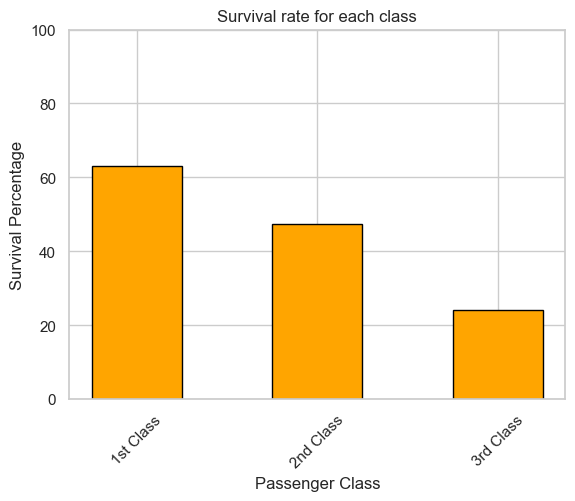

In [156]:
plt.bar(survival_percentages.index, survival_percentages, width=0.5, align='center', edgecolor='black', color='orange')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Percentage')
plt.title('Survival rate for each class')
plt.xticks(survival_percentages.index, labels=['1st Class', '2nd Class', '3rd Class'], rotation=45)
plt.ylim(0, 100)
plt.show()

#### What was the survival rate for men and women?

In [157]:
survival_percentages_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("Survival rate by sex:", survival_percentages_by_sex)

Survival rate by sex: Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


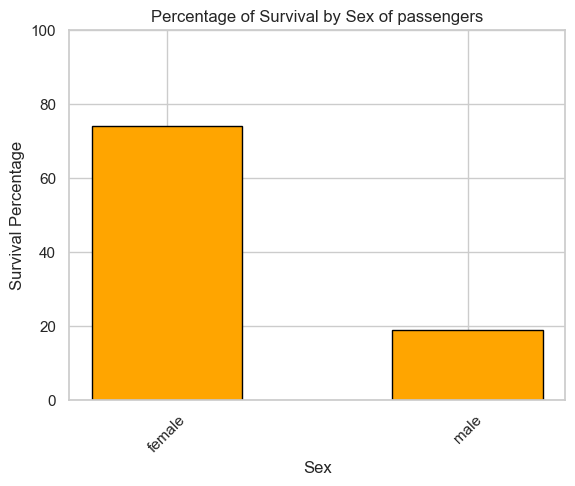

In [158]:
plt.bar(survival_percentages_by_sex.index, survival_percentages_by_sex, width=0.5, align='center', edgecolor='black', color='orange')
plt.xlabel('Sex')
plt.ylabel('Survival Percentage')
plt.title('Percentage of Survival by Sex of passengers')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

#### What was the distribution of passengers according to boarding city?

In [159]:
passengers_per_city = df['Embarked'].value_counts()
passengers_per_city

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

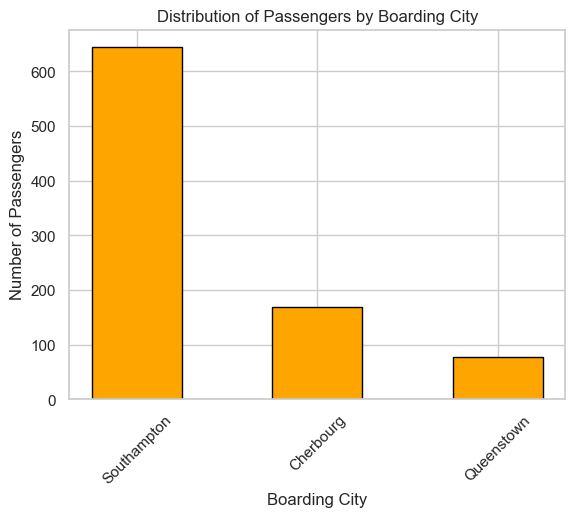

In [160]:
plt.bar(passengers_per_city.index, passengers_per_city, width=0.5, align='center', edgecolor='black', color='orange')
plt.xlabel('Boarding City')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passengers by Boarding City')
plt.xticks(rotation=45)
plt.show()

#### What was the distribution of ticket prices?

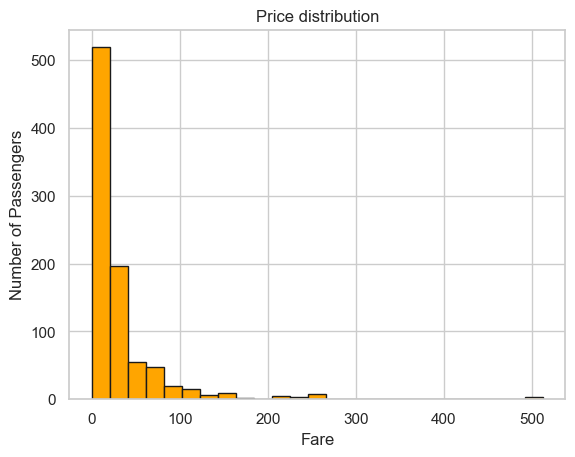

In [161]:
plt.hist(df['Fare'], bins=25, edgecolor='k', color='orange')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.title('Price distribution')
plt.show()

#### What was the relationship between age and ticket price?

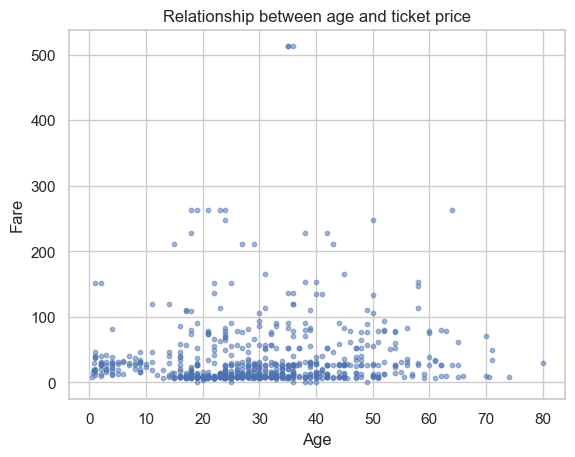

In [162]:
plt.scatter(df['Age'], df['Fare'], s=10, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between age and ticket price')
plt.show()

#### What is the survival rate for each passenger class, broken down by gender?

In [163]:
survival_percentages = df.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100
survival_percentages

Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64

#### What was the average age of surviving passengers compared with those who did not survive?

In [164]:
average_age_survived = df[df['Survived'] == 1]['Age'].mean()
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

print("Average age of survivors:", average_age_survived)
print("Average age of non-survivors:", average_age_not_survived)

Average age of survivors: 28.343689655172415
Average age of non-survivors: 30.62617924528302


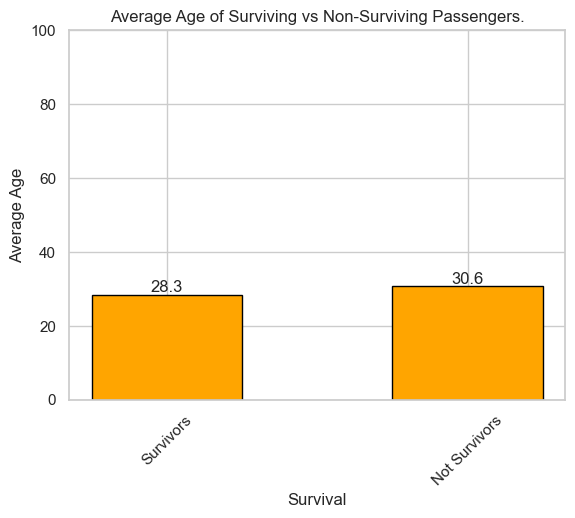

In [166]:
labels = ['Survivors', 'Not Survivors']
mean_ages = [average_age_survived, average_age_not_survived]

plt.bar(labels, mean_ages, width=0.5, align='center', edgecolor='black', color='orange')

for i, v in enumerate(mean_ages):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.xlabel('Survival')
plt.ylabel('Average Age')
plt.ylim(0,100)
plt.title('Average Age of Surviving vs Non-Surviving Passengers.')
plt.xticks(rotation=45)
plt.show()